In-class exercise 8.2
UW AMATH 301 - Jakob Kotas

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import time

Text(0, 0.5, 'y')

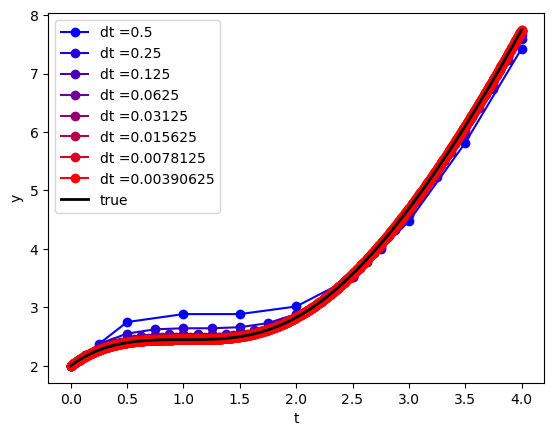

In [5]:
#2
def f(t,y): #y' = f(t,y)
    return 3*(t-1)**2/y

def ytrue(t): #analytical solution y(t)
    return np.sqrt(2*t**3-6*t**2+6*t+4)

dtvec = 2.**np.arange(-1,-9,-1) #dt's to cycle through
tfin = 4 #final time
localerror = np.zeros(np.shape(dtvec)) #initiate vectors
globalerror = np.zeros(np.shape(dtvec))

#colors for plotting. see https://matplotlib.org/stable/users/explain/colors/colormaps.html
colormap = plt.cm.gist_ncar
plt.gca().set_prop_cycle(plt.cycler('color', plt.cm.brg(np.linspace(0, 1, 15))))

#(a,b,c)
#solve using Euler's method and plot
for i in range(0,len(dtvec)):
    dt = dtvec[i]
    tvec = np.arange(0,tfin+dt/2,dt)
    yold = 2 #initial condition
    eulervec = np.array(yold)
    for t in tvec[0:len(tvec)-1]:
        ynew = yold+dt*f(t,yold)
        eulervec = np.append(eulervec,ynew)
        yold = ynew
    plt.plot(tvec,eulervec,'-o',label='dt ='+np.array2string(dt))
    localerror[i] = np.abs(eulervec[1]-ytrue(dt)) #absolute local error
    globalerror[i] = np.abs(eulervec[-1]-ytrue(tfin)) #absolute global error

#plot analytical solution
plt.plot(tvec,ytrue(tvec),'-k',label='true',linewidth='2')
plt.legend()
plt.xlabel('t')
plt.ylabel('y')

slope of local error = 1.931468216771251
slope of global error = 0.9924695611666796


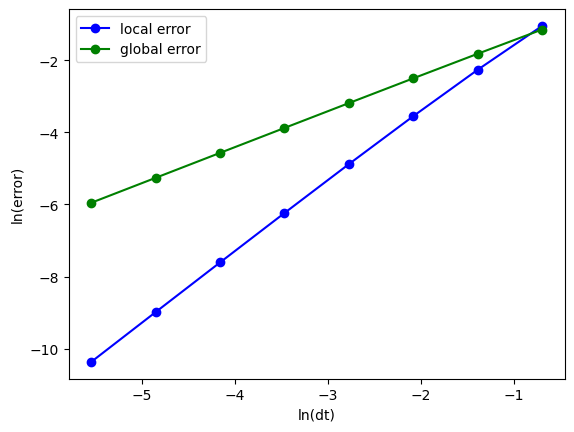

In [7]:
plt.plot(np.log(dtvec),np.log(localerror),'-bo',label='local error')
plt.plot(np.log(dtvec),np.log(globalerror),'-go',label='global error')
plt.xlabel('ln(dt)')
plt.ylabel('ln(error)')
plt.legend()

#least-squares linear fit: coming in ch. 4
localslope,_ = np.polyfit(np.log(dtvec),np.log(localerror),1)
globalslope,_ = np.polyfit(np.log(dtvec),np.log(globalerror),1)
print('slope of local error =',localslope)
print('slope of global error =',globalslope)

0.9999955420350686


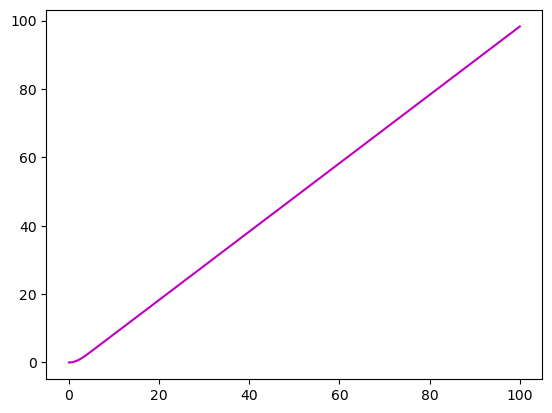

In [9]:
#3

def rhs(t,v):
    return np.array([v[1],v[2],-v[0]*v[2]/2])

tspan = np.array([0,100]) #starting and ending time
tt = np.linspace(tspan[0],tspan[1],1001)

#alpha = 0
alpha = 0.332

ic = np.array([0,0,alpha])
sol = solve_ivp(rhs,tspan,ic,method="RK45",t_eval=tt)
fsolve = sol.y[0]
gsolve = sol.y[1]
plt.plot(tt,fsolve,'-m') #y(t)

gfin = gsolve[-1]
print(gfin)

#plt.axis([0,10,0,10])
#plt.xlabel('t')
#plt.ylabel('f')

elapsed time, rk45 = 0.9307839870452881
elapsed time, radau = 0.005700826644897461


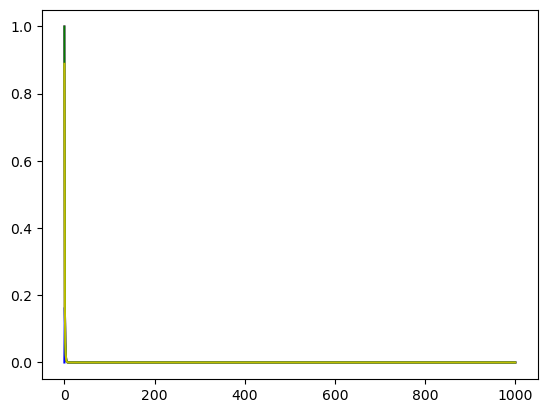

In [11]:
#4

def f(t,v):
    return np.array([-56*v[0]+55*v[1],44*v[0]-45*v[1]])

def xtrue(t):
    return 4/9*np.exp(-t)+5/9*np.exp(-100*t)

def ytrue(t):
    return 4/9*np.exp(-t)+5/9*0.8*np.exp(-100*t)

tspan = np.array([0,1000]) #starting and ending time
tt = np.linspace(tspan[0],tspan[1],1001)

ic = np.array([1,0])
starttimerk45 = time.time()
sol = solve_ivp(f,tspan,ic,method="RK45",t_eval=tt)
endtimerk45 = time.time()

starttimeradau = time.time()
sol = solve_ivp(f,tspan,ic,method="Radau",t_eval=tt)
endtimeradau = time.time()

xsolve = sol.y[0]
ysolve = sol.y[1]
plt.plot(tt,xsolve,'-m') #x(t)
plt.plot(tt,ysolve,'-b') #y(t)
plt.plot(tt,xtrue(tt),'-g')
plt.plot(tt,ytrue(tt),'-y')

print('elapsed time, rk45 =',endtimerk45-starttimerk45)
print('elapsed time, radau =',endtimeradau-starttimeradau)

#plt.axis([0,1,0,1])
#plt.xlabel('t')
#plt.ylabel('f')